<a id='back'></a>
# Table of Contents

* [Introduction](#intro)
* [Step 4. Exploratory Data Analysis](#step4)
     * [4.1 Importing files](#step4.1)
     * [4.2 Studying the contents of the data](#step4.2)
     * [4.3 Importing files](#step4.3)
     * [4.4 Studying the contents of the data](#step4.4)
     * [4.5 Ensure the data type is correct](#step4.5)
     * [4.6 Identify the top 10 regions to serve as delivery points](#step4.6)
     * [4.7 Graph the top 10 regions based on number of deliveries](#step4.7)
     * [4.8 Graph taxi companies and number of trips](#step4.8)
* [Step 5. Hypothesis Testing](#step5)

<a id='intro'></a>
## Introduction

<br>**Project description**
<br>In addition to the data you obtained in the previous assignment, you have been given a second file. Now, you have the following two CSV files:
<br>/datasets/project_sql_result_01.csv - contains the following data:
- company_name: taxi company name
- trips_amount: number of trips for each taxi company on 15-16 November 2017.

<br>/datasets/project_sql_result_04.csv - contains the following data:
- dropoff_location_name: name of the area in Chicago where the trip ends
- average_trips: average number of trips ending in each region in November 2017.

<br>For both datasets, now you need to
- import both files
- study the contents of the data
- ensure the data type is correct
- identify the top 10 regions to serve as delivery points
- create graphs: taxi companies and number of trips, top 10 regions by number of deliveries
- draw conclusions based on the graphs that have been made and explain the results

[Back to Content](#back)

Importing libraries

In [1]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<a id='step4'></a>
## Step 4. Exploratory data analysis

<a id='step4.1'></a>
### 4.1 Import files

In [2]:
company_data = pd.read_csv('/datasets/project_sql_result_01.csv') 
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
company_data.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<a id='step4.2'></a>
### 4.2 Study the contents of the data

In [4]:
company_data.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [5]:
company_data.duplicated().sum()

0

<br>Based on the information provided regarding company data, these are some conclusions:

1. Data Frame Information:
- The data frame has 64 rows (entries) and 2 columns.
- The columns are "company_name" and "trips_amount" (number of trips).
- There are no null values (NA/null values) in these two columns.
2. Data Type:
- "company_name" has an object data type (string).
- "trips_amount" has an integer data type.
3. Data Duplication:
- There is no duplicate data in the data frame. All entries are unique.
4. Example Data (first 5 data):
- Shows the first five data of the data frame, displays the company name and number of trips.

<br>With this information, you have an idea of the structure and cleanliness of the company data used. This data has information about the name of the company and the number of trips associated with each company

<a id='step4.3'></a>
### 4.3 Import files

In [6]:
dropoff_data = pd.read_csv('/datasets/project_sql_result_04.csv') 
dropoff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


<a id='step4.4'></a>
### 4.4 Study the contents of the data

In [7]:
dropoff_data.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
dropoff_data.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [9]:
dropoff_data.duplicated().sum()

0

<a id='step4.5'></a>
### 4.5 Ensure that the data type is correct

In [10]:
dropoff_data['average_trips'] = dropoff_data['average_trips'].round()

dropoff_data['average_trips'] = dropoff_data['average_trips'].astype('int')

dropoff_data.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


In [11]:
dropoff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB


<br>The following is an explanation based on the information provided about the DataFrame "dropoff_data":

1. Initial Frame Data Information:
- The data frame has 94 rows and 2 columns.
- The columns are "dropoff_location_name" (drop-off location name) and "average_trips" (average trip).
- "dropoff_location_name" has data type object (string).
- "average_trips" has data type float64 (decimal number).
2. Data Types and Null Values:
- There are no null values (NA/null values) in these two columns.
3. Data Duplication:
- There is no duplicate data in the data frame. All entries are unique.
4. Data Type Change and Trip Average Value Playback:
- The average trip value ("average_trips") is converted to an integer data type by rounding using .round() and converting to an integer data type using .astype('int').
5. Data Frame Information After Change:
- After the change, the data type of the "average_trips" column is int64 (integer data type).

    
<br>In the end, the data has been processed so that the average trip ("average_trips") is an integer and the data type of the column has been changed accordingly. This data contains information about the name of the drop-off location and the average trip to that location.

<a id='step4.6'></a>
### 4.6 Identify the top 10 regions used as delivery points

In [12]:
top10 = dropoff_data.sort_values(by='average_trips', ascending=False).head(10)

top10

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


In [13]:
top10.describe()

,average_trips
count,10.000000
mean,4325.100000
std,3530.135863
min,1260.000000
25%,1649.750000
50%,2484.000000
75%,6289.750000
max,10727.000000


<a id='step4.7'></a>
### 4.7 Create a graph of the top 10 regions based on the number of deliveries

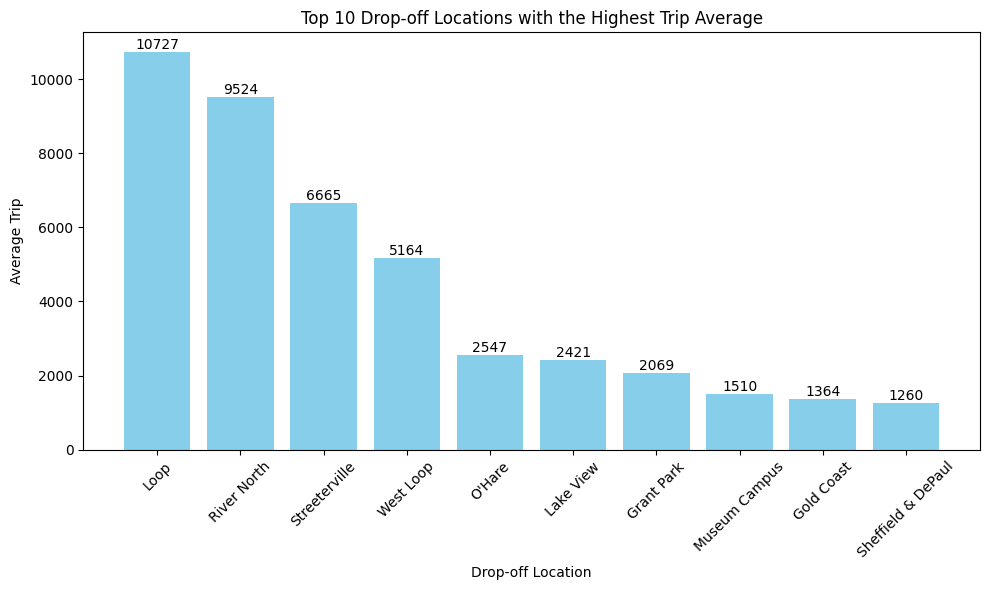

In [14]:
# Data for graphs
locations = top10['dropoff_location_name']
average_trips = top10['average_trips']

# Create graphs
plt.figure(figsize=(10, 6))
bars = plt.bar(locations, average_trips, color='skyblue')

# Add value labels above the bars
for bar in bars:
     yval = bar.get_height()
     plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Drop-off Location')
plt.ylabel('Average Trip')
plt.title('Top 10 Drop-off Locations with the Highest Trip Average')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<br>Based on the sorted data ("top10") for the drop-off locations with the highest trip averages, here are some conclusions:

1. Drop-off Location with the Highest Trip Average:
- The "Loop" location has the highest trip average with approximately 10,727 trips.
Followed by "River North" with about 9,524 rides, and "Streeterville" with about 6,665 rides.
2. Variation in Number of Trips:
- There is significant variation in the average number of trips between top drop-off locations. This shows that some locations have higher travel demand than others.
3. Use of Public Transportation:
- These locations may be areas frequently visited and accessed by many people, requiring more travel using public transportation such as taxis or rideshare services.
4. Business Potential and Transportation Services:
- This information can be useful for transportation service providers to identify locations that have high demand, so they can focus services and maximize operational efficiency in these areas.

    
<br>A deeper understanding of the trends and characteristics of these locations can help make better decisions about improving transportation services or developing businesses in areas of high demand.

<a id='step4.8'></a>
### 4.8 Make a graph of taxi companies and the number of trips

In [15]:
company_data.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


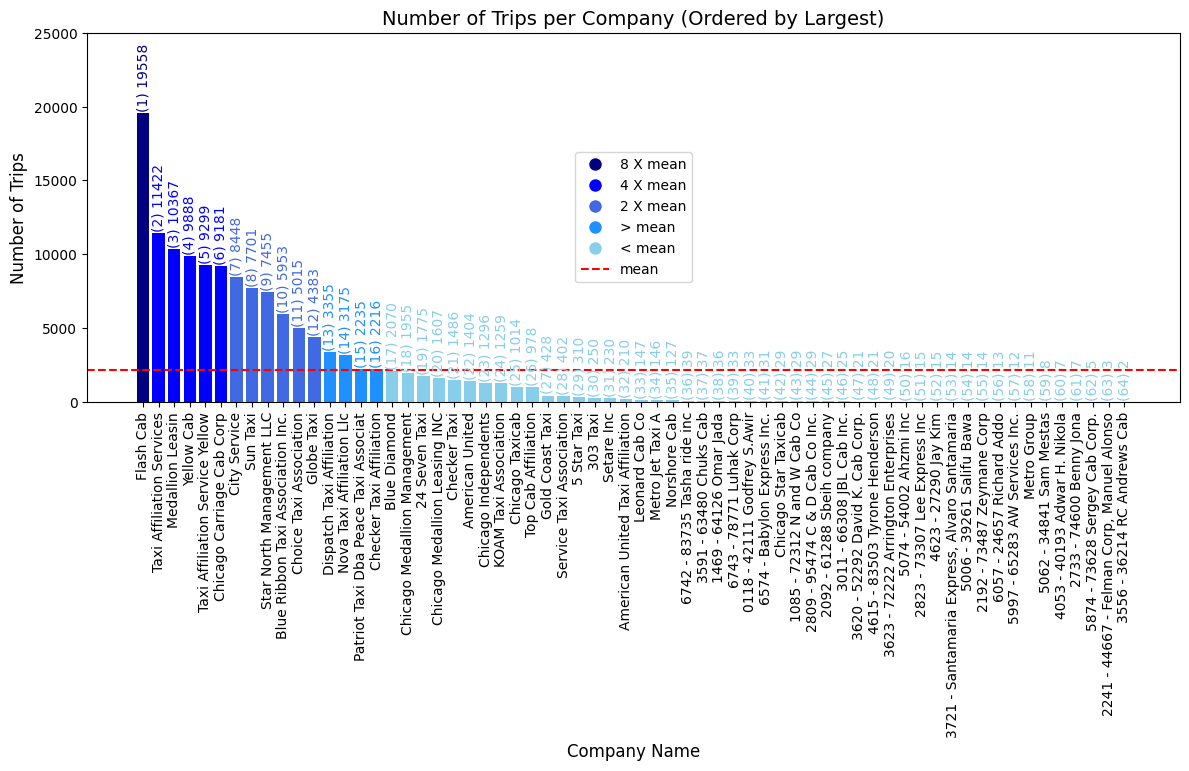

In [16]:
# Sort the DataFrame based on trips_amount in descending order (from large to small)
company_data_sorted = company_data.sort_values(by='trips_amount', ascending=False)

# Data from a DataFrame that has been sorted
company_names_sorted = company_data_sorted['company_name']
trips_amount_sorted = company_data_sorted['trips_amount']

# Create bar graphs
plt.figure(figsize=(12, 8))

# Create bar graphs
mean_trips = company_data['trips_amount'].mean()

# Enter dark blue (navy) for values greater than the mean
colors = []
for trips in trips_amount_sorted:
    if trips > 8 * mean_trips:
        colors.append('navy')
    elif trips > 4 * mean_trips:
        colors.append('#0000FF')
    elif trips > 2 * mean_trips:
        colors.append('#4169E1')
    elif trips > mean_trips:
        colors.append('#1E90FF')
    else:
        colors.append('skyblue')


bars = plt.bar(company_names_sorted, trips_amount_sorted, color=colors)

plt.axhline(y=mean_trips, color='red', linestyle='--', label='Mean')  # Horizontal line for the mean

plt.xlabel('Company Name', fontsize=12) # x-axis label
plt.ylabel('Number of Trips', fontsize=12) # y-axis label
plt.title('Number of Trips per Company (Ordered by Largest)', fontsize=14) # Chart title
plt.xticks(rotation=90) # Rotate the x-axis labels to make them legible

# Add value and rank in the middle of the bar with a 90 degree rotation
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'({i+1}) {trips_amount_sorted[i]}', ha='center', va='bottom', fontsize=10, rotation=90, color=colors[i])
 
 
plt.tight_layout()
# Added lineless legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='navy', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#0000FF', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#4169E1', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#1E90FF', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10),
    plt.Line2D([0], [0], color='red', linestyle='--')
]

labels = ['8 X mean', '4 X mean', '2 X mean', '> mean', '< mean', 'mean']

plt.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, 0.5))
plt.ylim(0, 25000)

# Show graph
plt.show()


<br>Based on the summary and examples of taxi company data that you provided, the following are the conclusions regarding the number of trips (trips_amount) of taxi companies:

1. Average Number of Trips:
- The average number of taxi company trips is around 2145.48 trips.

2. Standard Deviation:
- The standard deviation of the number of trips is approximately 3812.31. A high standard deviation indicates considerable variation in the data.

3. Distribution of Number of Trips:
- Minimum number of trips is 2.
- The first quartile (Q1) or lowest 25% is around 20.75 trips.
- The median number of trips (Q2 or second quartile) is around 178.5 trips, which means half of the companies have less than 178.5 trips and the other half have more than 178.5 trips.
The third quartile (Q3) or lowest 75% is around 2106.5 trips.
The maximum number of trips is 19558.
4. Companies with the Highest Number of Trips:
- The company with the highest number of trips is "Flash Cab" with 19558 trips.

5. Companies with the Lowest Number of Trips:
- There are several companies that have the lowest number of trips, such as "2241 - 44667 - Felman Corp" with only 3 trips and "3556 - 36214 RC Andrews Cab" with only 2 trips.

6. Companies with a Significant Amount of Travel:
- Apart from "Flash Cab" with the highest number of trips, several other companies also have a significant number of trips, such as "Taxi Affiliation Services", "Medallion Leasing", "Yellow Cab", and others.

7. Distribution of Number of Trips:
- The distribution of the number of trips varies greatly from company to company. Some companies have a very high number of trips, while others have a very low number.
    
<br>There are only 16 companies that are above the mean, it can be concluded that this business is controlled by a small number of companies

[Back to Content](#back)

<a id='step5'></a>
## Step 5. Testing the hypothesis

In [17]:
loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv') 
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [18]:
loop_ohare.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [19]:
loop_ohare.duplicated().sum()

197

In [20]:
# Remove duplicates
loop_ohare.drop_duplicates(inplace=True)

# Display DataFrame information after removing duplicates
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            871 non-null    object 
 1   weather_conditions  871 non-null    object 
 2   duration_seconds    871 non-null    float64
dtypes: float64(1), object(2)
memory usage: 27.2+ KB


In [21]:
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<br>describes the steps you have taken regarding removing duplicate data in the loop_ohare DataFrame.

1. Counting the Number of Duplicates Before Deletion
- loop_ohare.duplicated().sum()
- In this step, you use the duplicated() method to identify and count the number of rows that are duplicates. The result is 197 rows that are duplicates before deletion.

2. Removing Duplicates
- loop_ohare.drop_duplicates(inplace=True)
- You use the drop_duplicates() method with the inplace=True parameter to remove rows that are duplicates from the DataFrame. This method effectively eliminates rows that have the same values for all columns.

3. Display DataFrame Information After Duplicate Removal
- loop_ohare.info()
- In this final step, you use info() to display information about the DataFrame after duplicate removal. The information displayed includes the number of entries, number of columns, and data type of each column.

<br>After these steps have been performed, the loop_ohare DataFrame now has 871 entries (rows) after removing the 197 duplicate entries that existed previously.

In [22]:
loop_ohare['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [23]:
# Change the data type 'start_ts' to date data type
loop_ohare['start_ts'] = pd.to_datetime(loop_ohare['start_ts'])

# Display DataFrame information after data type change
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


In [24]:
# Display the top five rows of a DataFrame after a data type change
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [25]:
# Add column 'day_name' based on 'start_ts'
loop_ohare['day_name'] = loop_ohare['start_ts'].dt.day_name()

# Display the top five rows of the DataFrame after adding the 'day_name' column
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds,day_name
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday


In [26]:
loop_ohare['day_name'].unique()

array(['Saturday'], dtype=object)

<br>In this section, we make two main changes to the loop_ohare DataFrame:

1. Data Type Change 'start_ts':
- Before the change, the 'start_ts' column had the data type 'object', which is not optimal for date and time data. Therefore, we use pd.to_datetime() to convert the 'start_ts' column to datetime data type.
- loop_ohare['start_ts'] = pd.to_datetime(loop_ohare['start_ts'])
- The result of this change is that the 'start_ts' column now has the data type 'datetime64[ns]'.

2. Added 'day_name' column:
- Next, we add a new column called 'day_name' which is obtained from extracting the name of the day based on the date from the 'start_ts' column.
- loop_ohare['day_name'] = loop_ohare['start_ts'].dt.day_name()
- Each row in the 'day_name' column reflects the name of the day that corresponds to the date from 'start_ts'.

<br>After these two changes, the loop_ohare DataFrame has a suitable data type and additional day information in the form of a 'day_name' column, which will make it easier to analyze based on specific days of the week. In the output shown, we can see the results of the top five rows of the DataFrame after adding the 'day_name' column.

In [27]:
good_weather = loop_ohare.query('weather_conditions == "Good"')
good_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 0 to 1064
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            723 non-null    datetime64[ns]
 1   weather_conditions  723 non-null    object        
 2   duration_seconds    723 non-null    float64       
 3   day_name            723 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 28.2+ KB


In [28]:
bad_weather = loop_ohare.query('weather_conditions == "Bad"')
bad_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 6 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            148 non-null    datetime64[ns]
 1   weather_conditions  148 non-null    object        
 2   duration_seconds    148 non-null    float64       
 3   day_name            148 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.8+ KB


In [29]:
# Perform Levene's test for homogeneity of variance
# good_weather['duration_seconds'] is travel duration data when the weather is good
# bad_weather['duration_seconds'] is travel duration data during bad weather
statistics_levene, p_value_levene = stats.levene(good_weather['duration_seconds'], bad_weather['duration_seconds'], center='mean')

# Print Levene's statistical value and Levene's p-value
print('Levene statistics:', statistics_levene)
print('P-value Levene:', p_value_levene)

# Determine the level of significance (alpha)
alpha = 0.05

# Check whether homogeneity of variance is met
if p_value_levene < alpha:
     print('Homogeneity of variance is not met (reject null hypothesis) so (equal_var=False)')
else:
     print('Homogeneity of variance is met (does not reject null hypothesis) so (equal_var=True)')

Levene statistics: 0.009302043488431442
P-value Levene: 0.9231877220445369
Homogeneity of variance is met (does not reject null hypothesis) so (equal_var=True)


In [30]:
# Perform a t test for two independent samples
# good_weather['duration_seconds'] is travel duration data when the weather is good
# bad_weather['duration_seconds'] is travel duration data during bad weather
t_statistic, p_value_t = stats.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'], equal_var=True)

# Print the t statistic value and p-value t
print('T statistics:', t_statistic)
print('P-value t:', p_value_t)

# Determine the level of significance (alpha)
alpha = 0.05

# Check whether there are significant differences between the two groups
if p_value_t < alpha:
     print('There is a significant difference between trip duration in good weather and bad weather (p-value < alpha)')
else:
     print('There is no significant difference between trip duration in good weather and bad weather (p-value >= alpha)')

T statistics: -5.427957689754561
P-value t: 7.397770692813658e-08
There is a significant difference between trip duration in good weather and bad weather (p-value < alpha)


<br>In this analysis, we have carried out Levene's test to check the homogeneity of variance between trip duration in good weather and bad weather. Levene's test results show that homogeneity of variance is met (p-value >= alpha) and (equal_var=True), so we can continue with the t test for two independent samples.

<br>Next, we carry out a t test to find out whether there is a significant difference between trip duration in good weather and bad weather. The results of the t test show that there is a significant difference between the two groups (p-value < alpha), which means that the duration of the trip in good weather and bad weather is significantly different.

<br>In conclusion, the weather affects the duration of the trip from the Loop to O'Hare International Airport. Travel duration during bad weather tends to be significantly different compared to travel duration during good weather.

[Back to Content](#back)